In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
script_dir = os.path.dirname(os.path.abspath(os.getcwd()))
file_path = os.path.join(script_dir, "raw_datasets", "wildfire.xlsx")
df = pd.read_excel(file_path)

In [3]:
df

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0017-ZAF,No,nat-cli-wil-lan,Natural,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",NaN,NaN,ZAF,...,NaN,NaN,8000.0,14156.0,10000.0,17695.0,56.514291,"[{""adm2_code"":77317,""adm2_name"":""City of Cape ...",2005-07-08,2023-09-25
1,2000-0104-ETH,No,nat-cli-wil-for,Natural,Climatological,Wildfire,Forest fire,NaN,NaN,ETH,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":40838,""adm2_name"":""Sidama""},{""ad...",2003-07-01,2023-09-25
2,2000-0117-IDN,No,nat-cli-wil-for,Natural,Climatological,Wildfire,Forest fire,NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":1522,""adm1_name"":""Kalimantan Bar...",2003-07-01,2023-09-25
3,2000-0128-USA,No,nat-cli-wil-for,Natural,Climatological,Wildfire,Forest fire,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm2_code"":28998,""adm2_name"":""Alachua""},{""a...",2003-07-01,2023-09-25
4,2000-0188-TUR,No,nat-cli-wil-for,Natural,Climatological,Wildfire,Forest fire,NaN,NaN,TUR,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":3028,""adm1_name"":""Balikesir""},{""...",2003-07-01,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2024-0897-USA,No,nat-cli-wil-wil,Natural,Climatological,Wildfire,Wildfire (General),NaN,'Franklin',USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-11,2025-03-18
315,2025-0008-USA,No,nat-cli-wil-wil,Natural,Climatological,Wildfire,Wildfire (General),NaN,"'Palisades', 'Eaton', 'Sunset', 'Kenneth', 'Hu...",USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-09,2025-02-12
316,2025-0022-ARG,No,nat-cli-wil-wil,Natural,Climatological,Wildfire,Wildfire (General),NaN,'Confluencia' and 'Epuyén' Fires,ARG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-17,2025-02-17
317,2025-0047-AUS,No,nat-cli-wil-wil,Natural,Climatological,Wildfire,Wildfire (General),NaN,NaN,AUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-29,2025-02-13


In [4]:
df.rename(columns={df.columns[0]: 'Year'}, inplace=True)
required_columns = ['Year', 'Disaster Type', 'Country', 'Location', 'Total Affected', 'Magnitude']
df = df[required_columns]
df['Year'] = df['Year'].astype(str).str[:4]
df['Location'] = df['Location'].str.split(',').str[0]

/var/folders/0p/vdvp33851vn1jcfb8t3_kyzm0000gn/T/ipykernel_3808/1703866343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(str).str[:4]
/var/folders/0p/vdvp33851vn1jcfb8t3_kyzm0000gn/T/ipykernel_3808/1703866343.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Location'].str.split(',').str[0]


In [7]:
df

,Year,Disaster Type,Country,Location,Total Affected,Magnitude
0,2000,Wildfire,South Africa,City of Capta Town Metropolitan Municipality (...,1250.0,NaN
1,2000,Wildfire,Ethiopia,Bale,5.0,970.0
2,2000,Wildfire,Indonesia,Riau province (Sumatra Isl.),NaN,NaN
3,2000,Wildfire,United States of America,Gainesville,600.0,113.0
4,2000,Wildfire,Türkiye,Bursa,350.0,8.0
...,...,...,...,...,...,...
314,2024,Wildfire,United States of America,Near Malibu city,150.0,NaN
315,2025,Wildfire,United States of America,Los Angeles County (northern of Los Angeles) a...,NaN,NaN
316,2025,Wildfire,Argentina,Epuyén town (Cushamen Department,1500.0,NaN
317,2025,Wildfire,Australia,Dimbola and Wail towns,260.0,NaN


In [8]:
df.shape

(319, 6)

In [5]:
df.isnull().sum()

Year                0
Disaster Type       0
Country             0
Location            1
Total Affected     79
Magnitude         231
dtype: int64

<Axes: xlabel='Magnitude'>

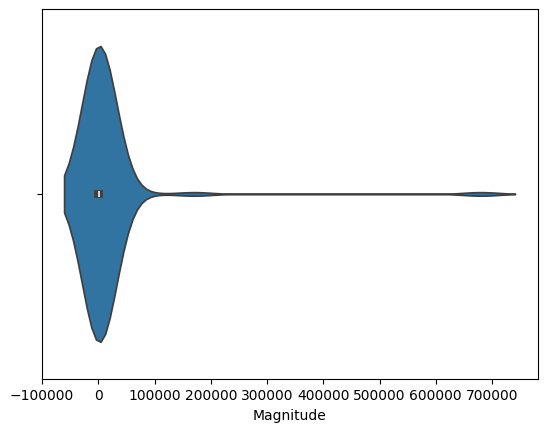

In [9]:
sns.violinplot(x = 'Magnitude', data = df)

In [10]:
df['Magnitude'] = df['Magnitude'].apply(
    lambda x : round(np.random.uniform(df['Magnitude'].min(), 200000), 1) if pd.isna(x) else x
)

/var/folders/0p/vdvp33851vn1jcfb8t3_kyzm0000gn/T/ipykernel_3808/3931042391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Magnitude'] = df['Magnitude'].apply(


In [12]:
df['Total Affected'].fillna(df['Total Affected'].mode()[0], inplace=True)
df['Location'].fillna(df['Location'].mode()[0], inplace=True)

/var/folders/0p/vdvp33851vn1jcfb8t3_kyzm0000gn/T/ipykernel_3808/1995198506.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Affected'].fillna(df['Total Affected'].mode()[0], inplace=True)
/var/folders/0p/vdvp33851vn1jcfb8t3_kyzm0000gn/T/ipykernel_3808/1995198506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Affecte

In [14]:
df.to_csv("wildfire_cleaned.csv", index=False)